# Clase 26

## Matplotlib

Matplotlib es un paquete para la producción de gráficos como un add-on de numpy. Usualmente es parte de la instalción de Python. Existe una extensiva [documentación](http://matplotlib documentation) y además una [galería](http://matplotlib.org/gallery.html) en donde una larga collección de figuras de alta calidad gráfica se pueden acceder junto con su código.

### Introducción: figuras simples

Generas figuras en python implica dos procesos diferentes llamados *front-ends* and *back-ends*

#### Front-end

El *front-end* es la interface de usuario. Como usuario uno debe decidir si el resultado de su figura debe depender de la ejecución de su intérpretre, en un caso más general, generar figuras sin el uso de ningún intérprete para luego invocarlas a tráves de un archivo de Python. La primera opción, más simple pero (un poquito) restrictiva es utilizar la rama `pyplot` de matplotlib. 
```python
import matplotlib.pyplot as plt
```
Exploremos el contenido de este módulo con
```
plt.<TAB>
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.

#### Back-end

El *front-end* tranfiere a Python las peticiones del usuario. Pero, ¿cómo se convierten estas en resultados visibles? La respuesta a esta pregunta depende del hardware y es el trbajo del *back-end* del software responderlas. El paquete `matplotlib` contiene un amplio rango de *back-ends*, ¿cuál debemos usar entonces? Por fortuna el instalador de Python automáticamente realiza esta elección al momento de la instalación para elegir el *back-end* óptimo para su máquina. El *back-end* que utiliza nuestra máquina se puede averiguar con la siguiente secuencia de comandos

In [2]:
import matplotlib 
matplotlib.matplotlib_fname()

'/etc/matplotlibrc'

#### Una figura simple

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

x=np.linspace(-np.pi,np.pi,101)
y=np.sin(x)+np.sin(3*x)/3.0

plt.plot(x, y)               # construye la figura
plt.savefig('foo.pdf')       # guarda la figura en el directorio local
plt.show()                   # muestra la figura y bloquea el intérprete

¡es muy sencillo! Hagamos ahora un ejercicio

---
### Ejercicio

*Vectorizando una función con una condición if*. Considere la función 
$$
f(x) = \frac{n}{1+n}\left\{
  \begin{array}{lr}
    0.5^{1+\frac{1}{n}}-(0.5-x)^{1+\frac{1}{n}}, & 0 \leq x \leq 0.5\\
    0.5^{1+\frac{1}{n}}-(x-0.5)^{1+\frac{1}{n}}, & 0.5 < x \leq 1
  \end{array}
\right.
$$
en donde $n$ es un número real tal que $0<n\leq 1$. (Esta ecuación describe la velociadad de un fluído en un canal cuando es sometido a presión.) Haga una función vectorizada para evaluar $f(x)$ para un conjunto $x$ de $m$ puntos igualmente espaciados entre 0 y 1 (no debe aparecer nungún loop sobre los valores de $x$), de tal manera que
```python
r = f(x)
```
donde `r` es un array con los resultados de aplicar `f(x)` sobre un array `x`.

Utilice luego matplotlib para visualizar sus resultados.

In [7]:
m = 100
x = np.linspace(0,1,m)

def f(x,n):
    '''
    args: x un array, n un float
    return: un array del tamaño de x
    '''
    
    x1 = 0.5**(1+1/n)-(0.5-x)**(1+1/n)
    x2 = 0.5**(1+1/n)-(x-0.5)**(1+1/n)
    return np.where(x<=0.5,x1,x2)

r1 = f(x,0.1)
r2 = f(x,0.4)
r3 = f(x,0.8)
r4 = f(x,0.99)

plt.plot(x,r1,'b-')
plt.plot(x,r2,'r--')
plt.plot(x,r3,'y-.')
plt.plot(x,r4,'g:')

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in power
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in power


---

#### Controles interactivos

Los siete botones interactivos en la parte baja de la ventana de matplotlib permiten la manipulación de la figura actual.

El boton 4 *pan/zoom tool* permite dos operaciones (primero se debeo oprimir el botón para activar la función y luego mover el puntero sobre la figura):
1. Pan: Se presiona el botón izquierdo del mouse mientras este se mueve a una nueva posición y luego se suelta. Presionando simultáneamente la tecla `x` o `y` la  acción el limitada en la dirección selecionada.
2. Zoom: Presione el botón derecho del mouse en un punto definifo y sosténganlo allí para ampliar la figura. Movimiento en la dirección horizontal hacia la derecha o izquierda genera un zoom proporcional en el eje x. El movimiento vertical realiza un zoom similar al hecho en el eje x. Las teclas `x` y `y` trabajan de la misma manera que en el caso anterior. Si se presiona la tecla `Ctrl` se preserva el aspecto de la figura.

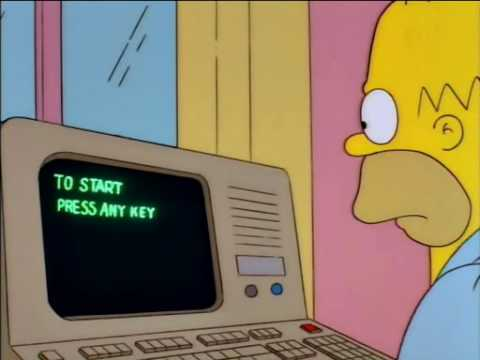

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('MIyJ2AiUGfA')

El botón 5 es un poco más conveniente. Presiónelo para activarlo y, presionando el botón izquierdo del mouse, dibuje en rectángulo en la figura. La porción rectangular seleccionada se ampliará.

El botón 1 nos retorna a la figura original y los botones 2 y 3 nos devuelven a las acciones previas sobre la figura. El botón 6 permite controlar las márgenes de la figura. En principio el botón 7 permite guardar la figura pero no siempre es funcional en todas las instalaciones.

## Figuras en el plano cartesiano

### La función `plot` de *matplotlib*

Esta es una función poderosa y versatil. Miremos su docstring:

In [3]:
plt.plot?

La forma más simple de llamar esta función es usando `plt.plot(x,y)`, donde `x` y `y` son arrays de numpy de una dimensión con la misma longitud. Esto genera una curva conectando los puntos `(x[0], y[0])`, `(x[1], y[1])`, ..., usando el estilo predeterminado para la figura. En general la función puede ser llamada como `plt.plot(x,y,fmt)` donde el parámetro(s) de formato `fmt` se describe a continuación.

#### Estilos de línea

Por *estilo de línea* nos referimos a su color, forma y grosor. Matplotlibs permite una gran variedad de descripciones para los colores; las más usadas son 


| Caracter        | Descripción  |
| :-------------: |:-------------:|
| b      | azul |
| g      | verde      |
| r | rojo      |
| c   |    cyan      |
| m      | magenta |
| y      | amarillo      |
| k | negro      |
| w   |    blanco      |

La forma de la curva se describe con

| Caracter        | Descripción  |
| :-------------: |:-------------:|
| -      | curva sólida (predeterminado) |
| --      | curva discontínua      |
| -. | curva discontínua a puntos      |
| :   |    curva punteada      |

Uan combinación de las opciones anteriores en el tercer argumento de la función `plt.plot` dará como resultado el estilod e curva deseado. Por ejemplo, para obtener una curva verde discontínua usamos el comando
```python
plt.plot(x,y,'g--')
```
o una curva cyan punteada
```python
plt.plot(x,y,'c:')
```

In [4]:
x=np.linspace(-np.pi,np.pi,101)
y=np.sin(x)+np.sin(3*x)/3.0

plt.plot(x, y,'r--')               # construye la figura
plt.show()

El último ajuste al estilo de la línea es el grosor medido por valores `float` en *puntos de impresión*. Podemos usar, por ejemplo, `linewidht=2` o `lw=2`. Entonces, para dibujar una línea amarilla discontínua a puntos con un grosor de dos puntos, usamos
```python
plt.plot(x,y,'y-.',lw=2)
```

In [ ]:
x=np.linspace(-np.pi,np.pi,101)
y=np.sin(x)+np.sin(3*x)/3.0

plt.plot(x, y,'y-.',lw=4)               # construye la figura
plt.plot(x, 0.5*y,'r--')               # construye la figura
plt.plot(x, 0.25*y)               # construye la figura
plt.plot(x, 0.75*y)               # construye la figura
plt.show()

---
### Ejercicio

1. Dibuje la función seno y la función coseno en el intervalo $[0,2\pi]$ en una misma figura usando diferentes colores, estilos de línea y grosores.
2. Considere la función $f(x)$ definida entre $(-\pi,\pi]$
$$
f(x) = \left\{
  \begin{array}{lr}
    -1, & -\pi < x < 0\\
    1, & 0 \leq x \leq \pi,
  \end{array}
\right.
$$
Una aproximación a ella (se serie de Fourier) es
$$
\mathcal{F}(x) = \frac{4}{\pi}\sum_{n=0}^N \frac{\sin [(2n+1)x]}{(2n+1)}
$$

Grafique en una misma figura (utilizando diferentes colores y estilos de línea) la función $f(x)$ y la función $\mathcal{F}(x)$ para $N=1,2,3,10,100$ en el intervalo $(-\pi,\pi]$. Observe como $\mathcal{F}(x)$ se parece más a $f(x)$ a medida que $N$ crece.